# Hey in this project we using a text kind architecture and image as well ,so it is considered to be a Hybrid archietectute, and this is a multimodal

In [1]:
!pip install diffusers transformers accelerate

In [2]:
#stable Diffusion is an LLm for Working with images


from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [3]:
!pip show torch

Name: torch
Version: 2.8.0+cu126
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.12/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchdata, torchvision


In [6]:
model1 = "dreamlike-art/dreamlike-diffusion-1.0"
model2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model1,torch_dtype = torch.float16,use_safetensors = True)
pipe = pipe.to("cuda")

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [8]:
prompt1 = "give me a super Car which can fly where it have to be like in black and white with racing kind of design on it "

In [9]:
image = pipe(prompt1).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

Image


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

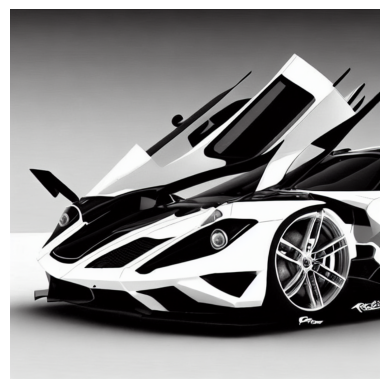

In [11]:
print("Image")
plt.imshow(image)
plt.axis("off")

In [16]:
prompt2 = "a super bike in red color where a make a sticker on it as Avinash"
image2 = pipe(prompt2).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

a super bike in red color where a make a sticker on it as Avinash


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

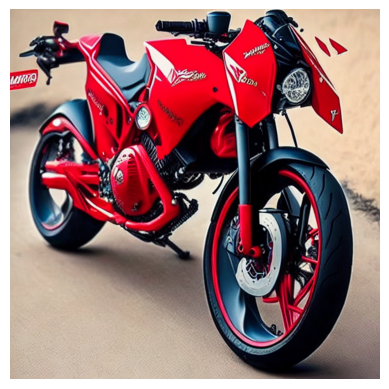

In [17]:
print(prompt2)
plt.imshow(image2)
plt.axis("off")

# Now working with Stable Diffusion Parameters
.Negative prompting

.num_inference_stes

.height

.weight

.num_images_per_prompt


In [18]:
def generate_images(pipe,prompt,params):
  img = pipe(prompt,**params).images

  num_images = len(img)
  if num_images > 1:
    fig,ax = plt.subplots(nrows = 1,ncols = num_images)
    for i in range(num_images):
      ax[i].imshow(img[i])
      ax[i].axis('off')
  else:
    fig = plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()

In [26]:
prompt = "show me a big building image"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

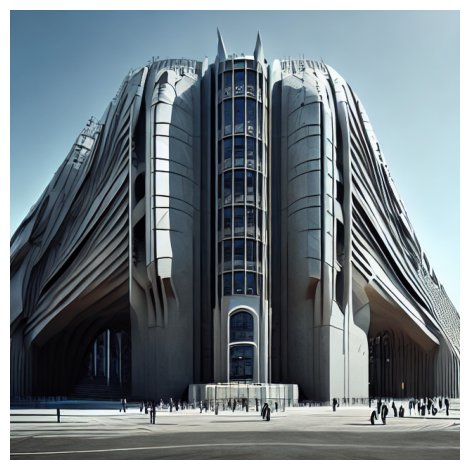

In [27]:
generate_images(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

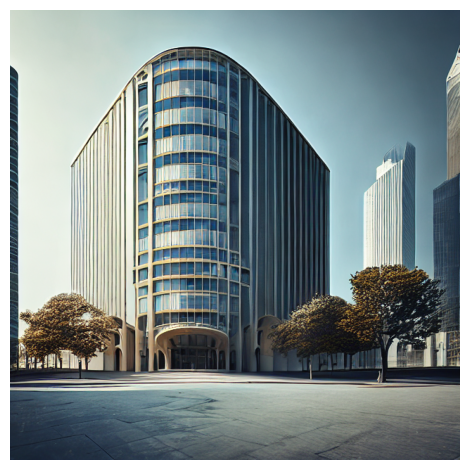

In [28]:
#num of inference steps
params = {'num_inference_steps':100}

generate_images(pipe,prompt,params)

  0%|          | 0/50 [00:00<?, ?it/s]

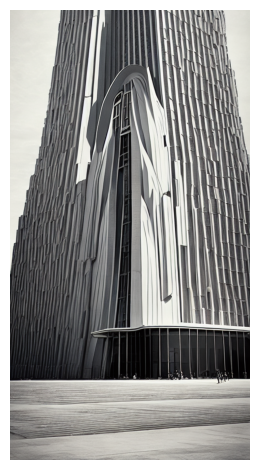

In [29]:
#hight,width

params = {'num_inference_steps' : 50,'width':512,'height':int(1.5*640)}
generate_images(pipe,prompt,params)

In [32]:
prompt3 = "A helicopter with rainbow colors"

  0%|          | 0/44 [00:00<?, ?it/s]

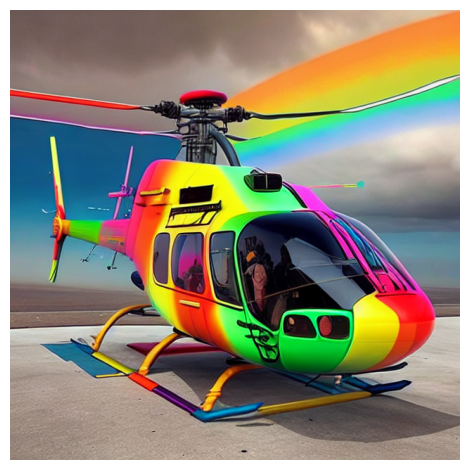

In [33]:
#num of images

params = {'num_inference_steps':44,'num_of_images_per_prompt':2,}

generate_images(pipe,prompt3,params)

  0%|          | 0/75 [00:00<?, ?it/s]

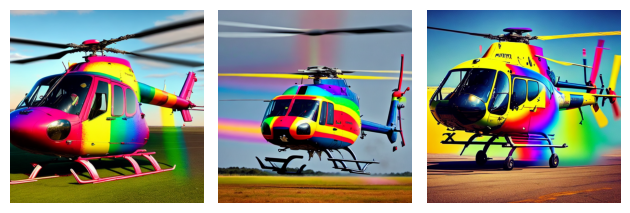

In [34]:
#negative Prompting

params = {'num_inference_steps':75,'num_images_per_prompt':3,'negative_prompt':'fans have to bent,glasses are broke'}
generate_images(pipe,prompt3,params)